# Objective


Phishing websites pose a significant internet security threat, exploiting human weaknesses rather than software flaws. Phishing involves tricking users into revealing sensitive information, such as usernames and passwords. The aim of this project is to train machine learning models and deep neural networks to predict phishing websites using a specially created dataset. This dataset contains both phishing and legitimate website URLs, from which various URL and content-based features are extracted. The accuracy and performance of each model are then evaluated and compared.

# Data

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = 'https://drive.google.com/uc?export=download&id=1PmbwX2CAWCbQE01EZQWHCR-aHKimZ25m'

df = pd.read_csv(url)

In [ ]:
df.head(10)

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
5,23107.txt,https://www.globalreporting.org,30,www.globalreporting.org,23,0,org,100.0,1.000000,0.079963,...,0,0,1,35,1,11,86,0,14,1
6,23034.txt,https://www.saffronart.com,25,www.saffronart.com,18,0,com,100.0,1.000000,0.522907,...,0,0,1,32,4,14,44,2,17,1
7,696732.txt,https://www.nerdscandy.com,25,www.nerdscandy.com,18,0,com,100.0,1.000000,0.522907,...,0,0,1,24,2,22,36,0,15,1
8,739255.txt,https://www.hyderabadonline.in,29,www.hyderabadonline.in,22,0,in,100.0,1.000000,0.005084,...,0,0,1,71,4,9,40,1,317,1
9,14486.txt,https://www.aap.org,18,www.aap.org,11,0,org,100.0,1.000000,0.079963,...,0,0,1,10,1,12,173,6,65,1


In [ ]:
df.shape

(235795, 56)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [ ]:
df.isnull().sum()

,0
FILENAME,0
URL,0
URLLength,0
Domain,0
DomainLength,0
IsDomainIP,0
TLD,0
URLSimilarityIndex,0
CharContinuationRate,0
TLDLegitimateProb,0


In [ ]:
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


# Data Processing

In [ ]:
for column in df.columns:
    unique_values = df[column].value_counts()
    print(f"\nUnique values for column '{column}':")
    print(unique_values)


Unique values for column 'FILENAME':
FILENAME
521848.txt      1
96605.txt       1
oph08639.txt    1
8024072.txt     1
8014599.txt     1
               ..
611368.txt      1
786974.txt      1
8008024.txt     1
702558.txt      1
384822.txt      1
Name: count, Length: 235795, dtype: int64

Unique values for column 'URL':
URL
https://disclosepack.myportfolio.com/                                                         2
https://barlandas.com/reprisedefunction/unzupdm/                                              2
http://app-batasotak1244acces.kvoiffugw9-yk26ed5vg379.p.temp-site.link/termsofservice.html    2
https://fleek.ipfs.io/ipfs/qmzt2xz7uq7tdgiirmv7u7zaabtfhjn8jzouurbptgtgal/                    2
https://sucursalvirtualpersona.la-empresaempre.repl.co/                                       2
                                                                                             ..
https://www.clothdiaperkids.com                                                               1
http

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:")
for col in categorical_cols:
    print(col)

Categorical Columns:
FILENAME
URL
Domain
TLD
Title


In [ ]:
df= df.drop(columns=['FILENAME', 'URL', 'Domain', 'Title'])

In [ ]:
# Enumerate the values in the "TLD" column
df['TLD'], tld_enum = pd.factorize(df['TLD'])

# Print the enumerated values
print("Enumerated values for column 'TLD':")
print(df['TLD'])

# Print the unique values corresponding to the enumerated values
print("\nUnique values corresponding to the enumerated values:")
print(tld_enum)

Enumerated values for column 'TLD':
0           0
1           1
2           2
3           0
4           3
         ... 
235790      0
235791      2
235792    104
235793     28
235794      0
Name: TLD, Length: 235795, dtype: int64

Unique values corresponding to the enumerated values:
Index(['com', 'de', 'uk', 'org', 'in', 'ie', 'hu', 'ru', 'gq', 'es',
       ...
       '166', 'ist', 'shoes', '14', 'ntt', '151', 'madrid', '46', 'film',
       'ne'],
      dtype='object', length=695)


In [ ]:
df.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,0,100.0,1.000000,0.522907,0.061933,3,1,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,1,100.0,0.666667,0.032650,0.050207,2,1,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,2,100.0,0.866667,0.028555,0.064129,2,2,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,0,100.0,1.000000,0.522907,0.057606,3,1,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,3,100.0,1.000000,0.079963,0.059441,3,1,...,1,0,1,244,15,34,72,1,85,1


In [ ]:
df.columns

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'label'],
      dtype='object')

# Visualization Of Data

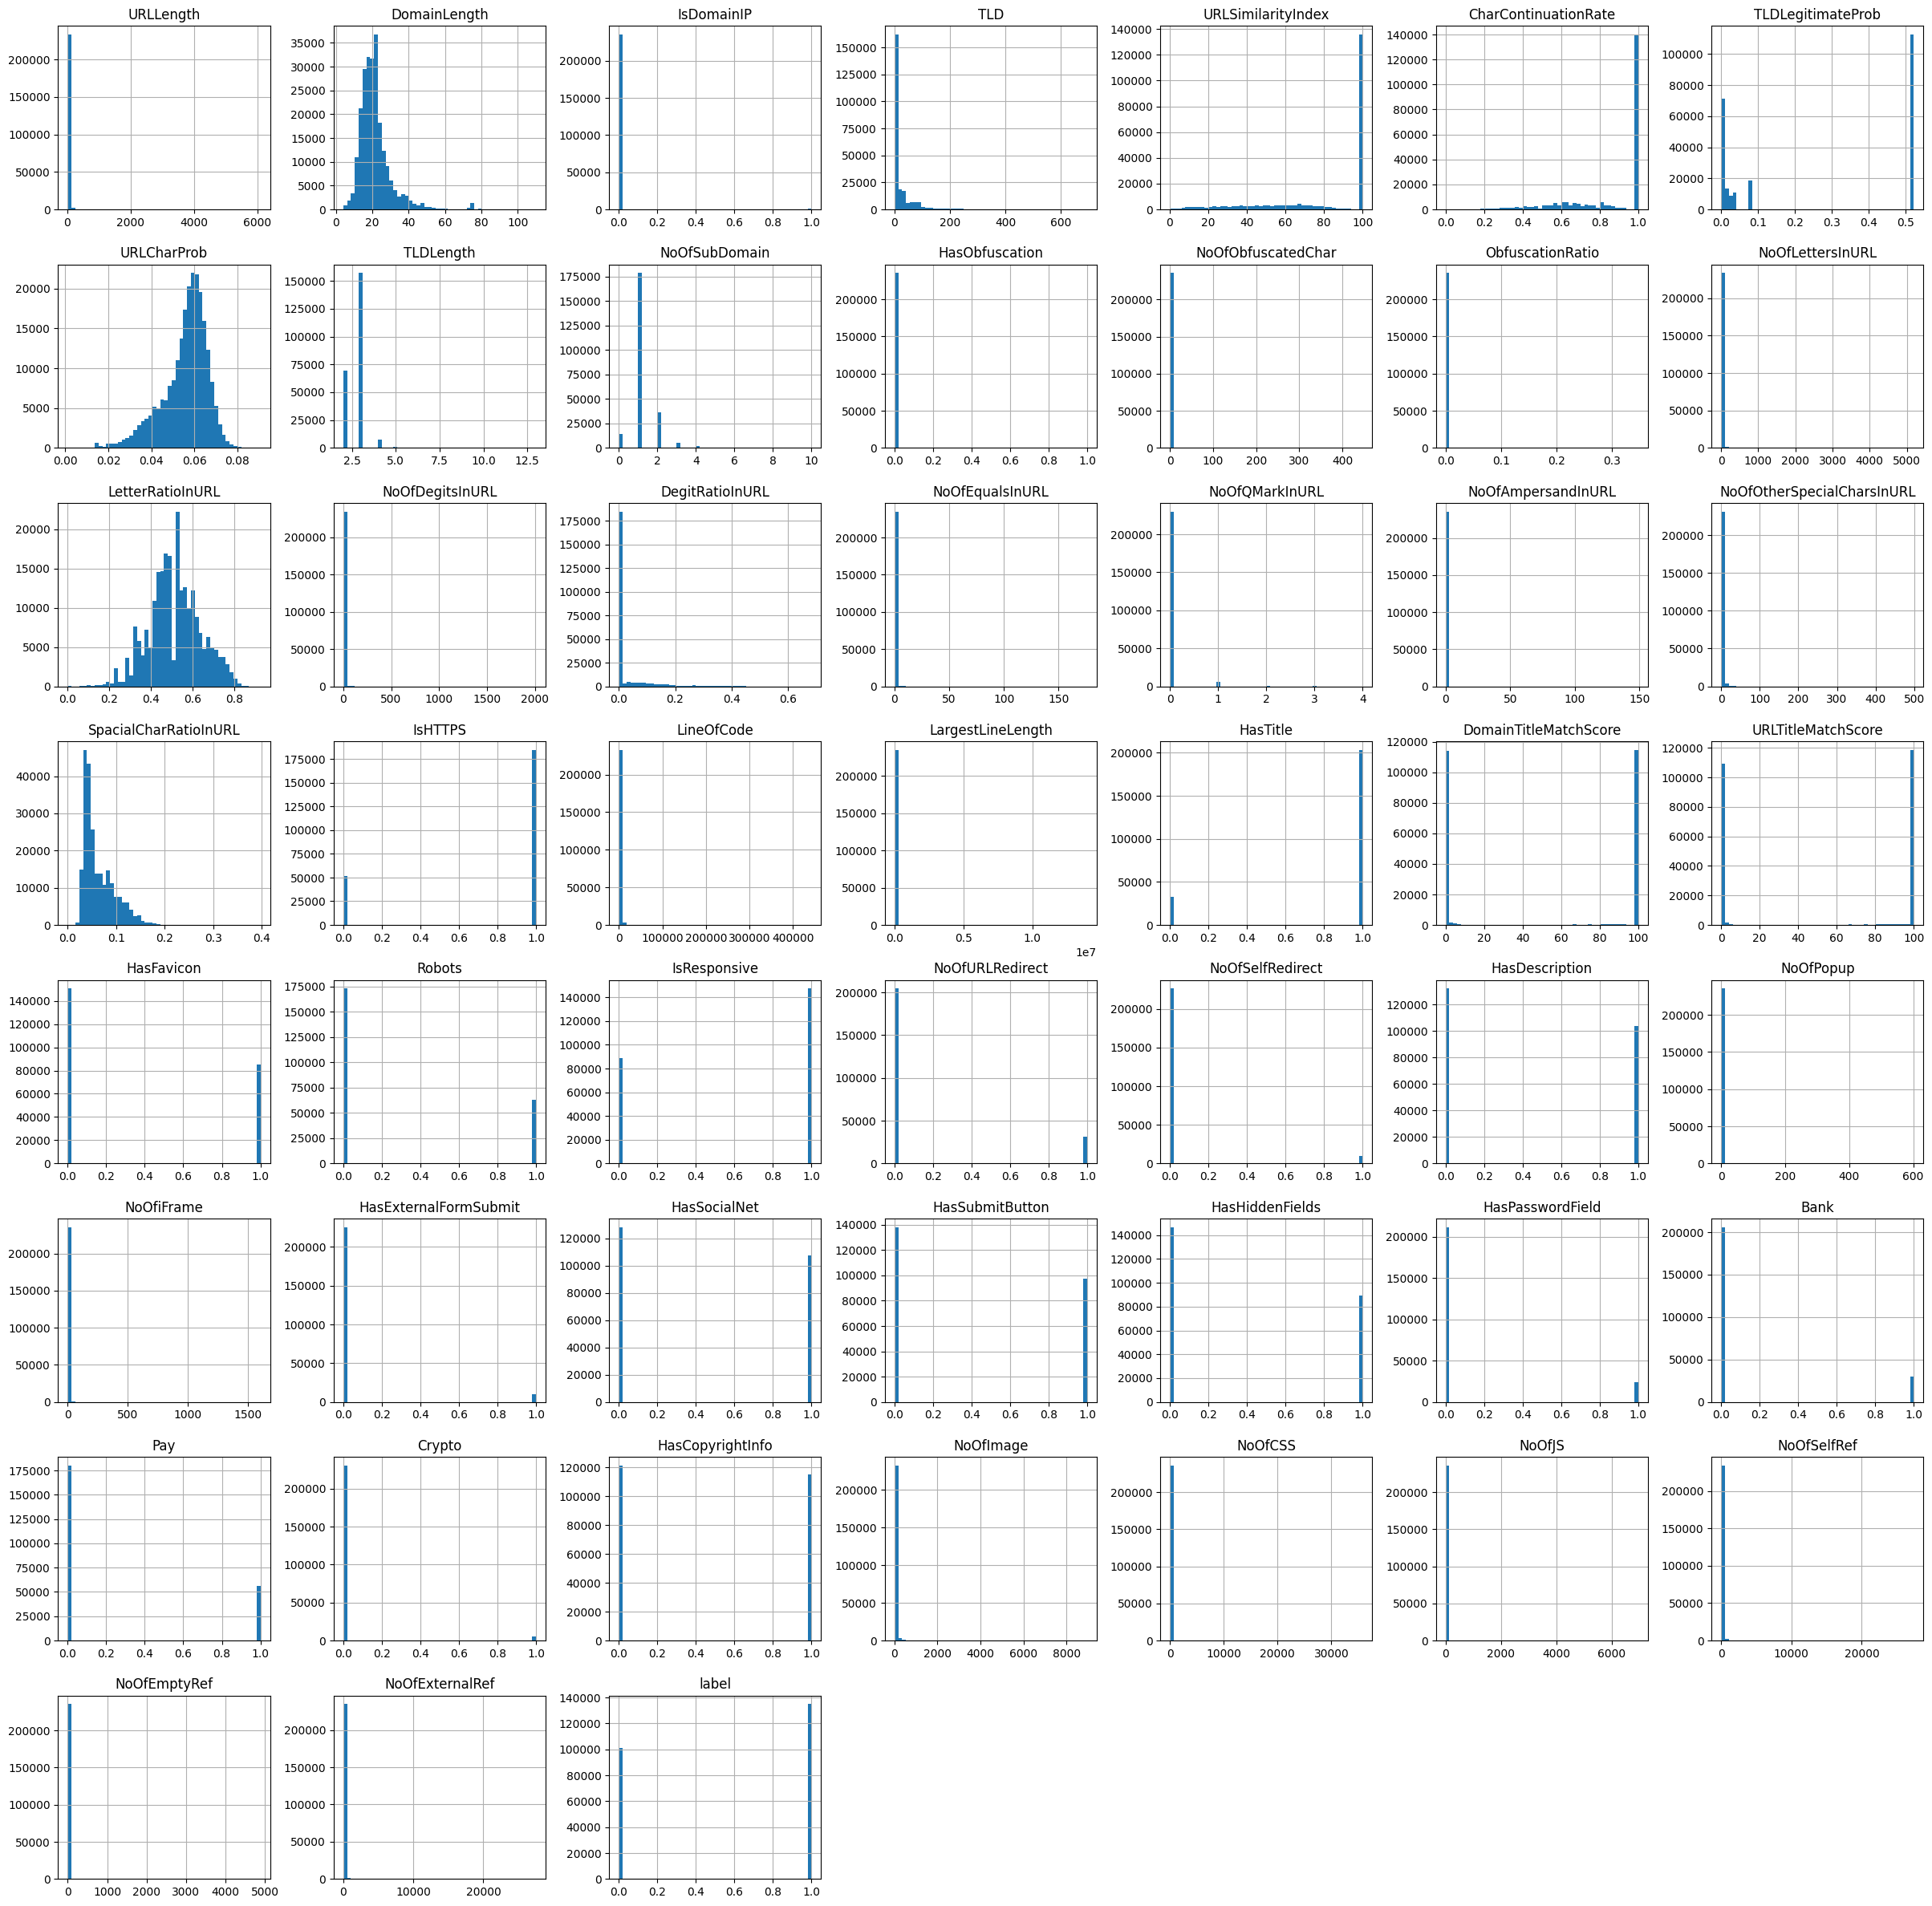

In [ ]:
#Plotting the data distribution
df.hist(bins = 50,figsize = (30,30))
plt.show()

# Correlation

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr('pearson')

# Flatten the correlation matrix into a 1D array excluding the diagonal
correlation_values = correlation_matrix.values.flatten()
correlation_values = correlation_values[correlation_values != 1]

# Calculate average correlation
average_correlation = correlation_values.mean()

print("Average correlation:", average_correlation)

Average correlation: 0.06148713319746663


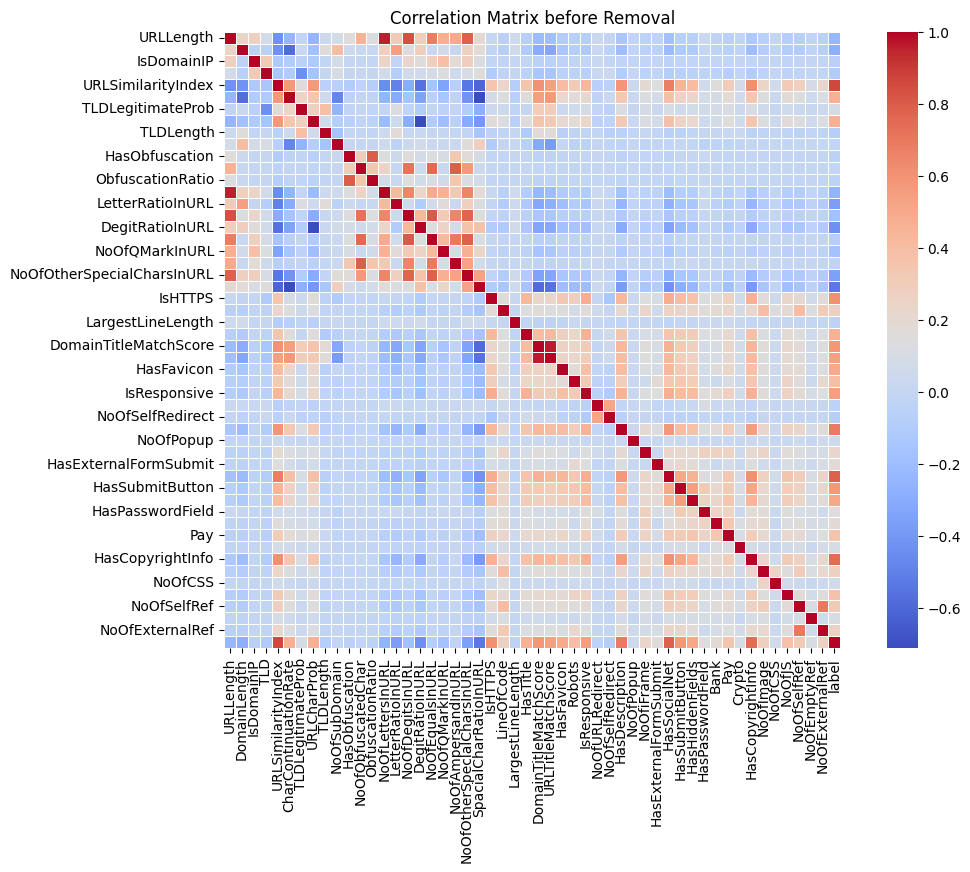

In [ ]:
# Calculate the correlation matrix before removing highly correlated features
correlation_matrix_before = df.corr('pearson')

# Plot the correlation matrix after removal
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_before, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix before Removal')
plt.savefig('Correlation Matrix before Removal.png')
#show in png format
plt.imshow(plt.imread('Correlation Matrix before Removal.png'))
#plt.axis('off')  # Optionally turn off axis
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

for col in df.columns:
    contingency_table = pd.crosstab(df[col], df['label'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {col}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print()


Chi-square test for URLLength:
Chi-square statistic: 67407.06168244261
P-value: 0.0

Chi-square test for DomainLength:
Chi-square statistic: 36976.8031780716
P-value: 0.0

Chi-square test for IsDomainIP:
Chi-square statistic: 852.260590396482
P-value: 2.3448225852057846e-187

Chi-square test for TLD:
Chi-square statistic: 72412.58849663034
P-value: 0.0

Chi-square test for URLSimilarityIndex:
Chi-square statistic: 232603.227390821
P-value: 0.0

Chi-square test for CharContinuationRate:
Chi-square statistic: 65322.87516163058
P-value: 0.0

Chi-square test for TLDLegitimateProb:
Chi-square statistic: 71998.95018702387
P-value: 0.0

Chi-square test for URLCharProb:
Chi-square statistic: 234441.34570621056
P-value: 3.286006817906975e-25

Chi-square test for TLDLength:
Chi-square statistic: 6820.319022704782
P-value: 0.0

Chi-square test for NoOfSubDomain:
Chi-square statistic: 26713.479728471255
P-value: 0.0

Chi-square test for HasObfuscation:
Chi-square statistic: 646.896659124284
P-valu

In [ ]:
correlation_matrix = df.corr('pearson')
threshold = 0.7
print("Removed features:")

correlated_features = set()
for _ in range(4):
    correlation_matrix = df.corr('pearson').abs()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if i != j and abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                if colname != "label":
                    correlated_features.add(colname)
                    print(colname)
    existing_columns = [col for col in correlated_features if col in df.columns]
    df = df.drop(columns=existing_columns)

dataf = df
dfknn = df

Removed features:
ObfuscationRatio
NoOfLettersInURL
NoOfDegitsInURL
NoOfDegitsInURL
DegitRatioInURL
NoOfEqualsInURL
NoOfEqualsInURL
NoOfAmpersandInURL
NoOfOtherSpecialCharsInURL
NoOfOtherSpecialCharsInURL
NoOfOtherSpecialCharsInURL
SpacialCharRatioInURL
URLTitleMatchScore
NoOfExternalRef


In [ ]:
dataf.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,label
0,31,24,0,0,100.0,1.000000,0.522907,0.061933,3,1,...,1,0,0,1,34,20,28,119,0,1
1,23,16,0,1,100.0,0.666667,0.032650,0.050207,2,1,...,0,0,0,1,50,9,8,39,0,1
2,29,22,0,2,100.0,0.866667,0.028555,0.064129,2,2,...,0,0,0,1,10,2,7,42,2,1
3,26,19,0,0,100.0,1.000000,0.522907,0.057606,3,1,...,0,1,1,1,3,27,15,22,1,1
4,33,26,0,3,100.0,1.000000,0.079963,0.059441,3,1,...,1,1,0,1,244,15,34,72,1,1


In [ ]:
dataf.shape

(235795, 42)

In [ ]:
dataf.describe()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,23.278416,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,...,0.127089,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,0.571895
std,41.314153,9.150793,0.051946,53.267103,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,...,0.333074,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,0.494805
min,13.000000,4.000000,0.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,20.000000,0.000000,2.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,1.000000
75%,34.000000,24.000000,0.000000,23.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,1.000000
max,6097.000000,110.000000,1.000000,694.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,1.000000


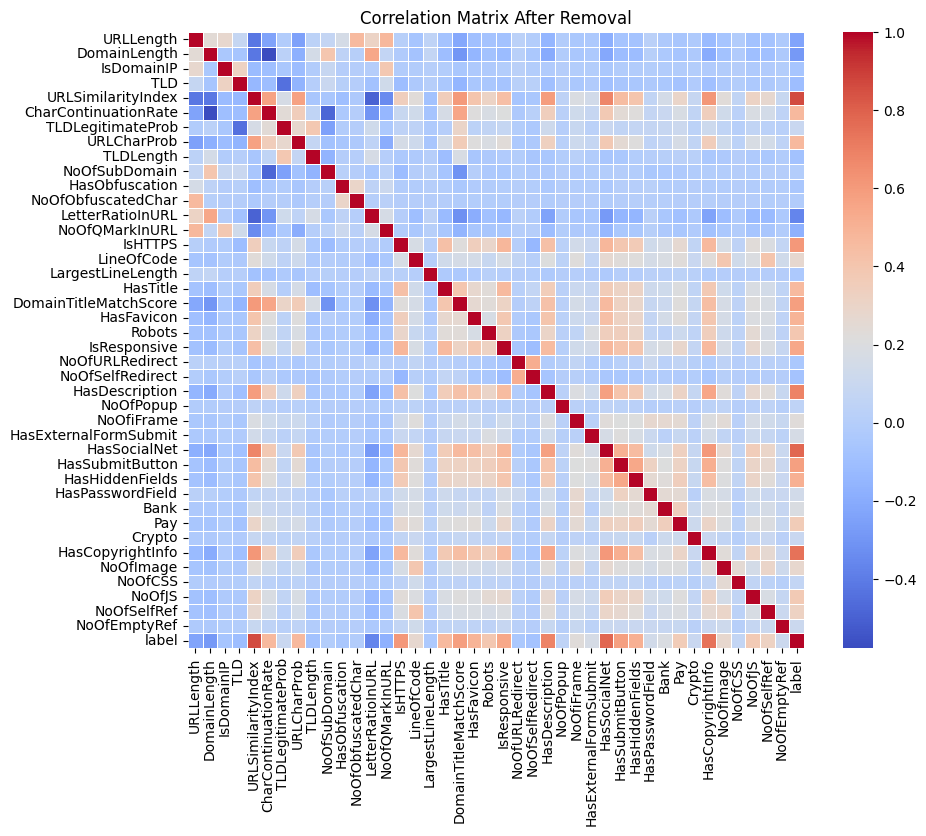

In [ ]:
correlation_matrix_after = dataf.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_after, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix After Removal')
plt.savefig('Correlation Matrix After Removal.png')
plt.imshow(plt.imread('Correlation Matrix After Removal.png'))
plt.show()

# Individual ML Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,roc_curve, auc

In [ ]:
X = dataf.drop(columns=['label'])
y = dataf['label']

In [ ]:
X.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef
0,31,24,0,0,100.0,1.000000,0.522907,0.061933,3,1,...,0,1,0,0,1,34,20,28,119,0
1,23,16,0,1,100.0,0.666667,0.032650,0.050207,2,1,...,0,0,0,0,1,50,9,8,39,0
2,29,22,0,2,100.0,0.866667,0.028555,0.064129,2,2,...,0,0,0,0,1,10,2,7,42,2
3,26,19,0,0,100.0,1.000000,0.522907,0.057606,3,1,...,0,0,1,1,1,3,27,15,22,1
4,33,26,0,3,100.0,1.000000,0.079963,0.059441,3,1,...,0,1,1,0,1,244,15,34,72,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Gaussian NB
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy for Gaussian NB: ", accuracy)

# F1 Score
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
print("F1 Score for Gaussian NB: ", f1_score)

# Precision
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precision for Gaussian NB:", precision)

# Recall
recall = metrics.recall_score(y_test, y_pred, average='weighted')
print("Recall for Gaussian NB: ", recall)

Accuracy for Gaussian NB:  0.9693589770775461
F1 Score for Gaussian NB:  0.96946861030998
Precision for Gaussian NB: 0.9713802579937144
Recall for Gaussian NB:  0.9693589770775461


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic_regression= LogisticRegression(multi_class='multinomial',max_iter=35000)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy for Logistic Regression: ", accuracy)

# F1 Score
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
print("F1 Score for Logistic Regression: ", f1_score)

# Precision
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precision for Logistic Regression:", precision)

# Recall
recall = metrics.recall_score(y_test, y_pred, average='weighted')
print("Recall for Logistic Regression: ", recall)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy for Logistic Regression:  0.9999575902796921
F1 Score for Logistic Regression:  0.9999575902796921
Precision for Logistic Regression: 0.9999575902796921
Recall for Logistic Regression:  0.9999575902796921


In [ ]:
#Perceptron
from sklearn.linear_model import Perceptron
from sklearn import metrics

per = Perceptron()
per.fit(X_train, y_train)
y_pred = per.predict(X_test)

# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy for Perceptron: ", accuracy)

# F1 Score
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
print("F1 Score for Perceptron: ", f1_score)

# Precision
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precision for Perceptron:", precision)

# Recall
recall = metrics.recall_score(y_test, y_pred, average='weighted')
print("Recall for Perceptron: ", recall)

Accuracy for Logistic Regression:  0.9878284102716343
F1 Score for Logistic Regression:  0.9878254388669229
Precision for Logistic Regression: 0.9878277133686166
Recall for Logistic Regression:  0.9878284102716343


# Ensemble Learning

In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy for Gradient Boosting: ", accuracy)

# F1 Score
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
print("F1 Score for Gradient Boosting: ", f1_score)

# Precision
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precision for Gradient Boosting:", precision)

# Recall
recall = metrics.recall_score(y_test, y_pred, average='weighted')
print("Recall for Gradient Boosting: ", recall)

Accuracy for Gradient Boosting:  0.999978795139846
F1 Score for Gradient Boosting:  0.9999787950724954
Precision for Gradient Boosting: 0.9999787959241656
Recall for Gradient Boosting:  0.999978795139846


In [ ]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import VotingClassifier

# Initialize individual models
perceptron = Perceptron(max_iter=1000)
logistic_regression = LogisticRegression(max_iter=100)
gaussian_nb = GaussianNB()
gradient_boosting = GradientBoostingClassifier(n_estimators=100)

# Combine using Voting Classifier
# Bagging will be applied on Perceptron, Logistic Regression, and GaussianNB
voting_classifier = VotingClassifier(
    estimators=[
        ('perceptron', BaggingClassifier(estimator=perceptron, n_estimators=10)),
        ('logistic_regression', BaggingClassifier(estimator=logistic_regression, n_estimators=10)),
        ('gaussian_nb', BaggingClassifier(estimator=gaussian_nb, n_estimators=10)),
        ('gradient_boosting', gradient_boosting)
    ],
    voting='soft'  # Soft voting for probability-based voting
)

# Fit the ensemble model
voting_classifier.fit(X_train, y_train)

# Predict
y_pred = voting_classifier.predict(X_test)

# Evaluation Metrics

# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy for the Bagging Ensemble: ", accuracy)

# F1 Score
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
print("F1 Score for the Bagging Ensemble: ", f1_score)

# Precision
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precision for the Bagging Ensemble:", precision)

# Recall
recall = metrics.recall_score(y_test, y_pred, average='weighted')
print("Recall for the Bagging Ensemble: ", recall)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for the Bagging Ensemble:  0.9983672257681461
F1 Score for the Bagging Ensemble:  0.998367569663565
Precision for the Bagging Ensemble: 0.9983720285883929
Recall for the Bagging Ensemble:  0.9983672257681461
